In [5]:
# !pip3 install matplotlib
# !pip3 install tabula-py
# !pip3 install PyPDF2
# !pip3 install pdfminer.six
# !pip3 install PyMuPDF
# !pip3 install camelot-py
# !pip3 install --upgrade pip
# !pip3 install geopandas
# !pip3 install plotly
# !pip3 install pandas
# !pip3 install pdfplumber

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import os
import PyPDF2
import tabula
import tabulate
import pdfminer
import geopandas as gpd
import fiona
from glob import glob
import plotly.express as px
from shapely.geometry import Point
import pdfplumber


In [ ]:
def convert_data (file_path):
    df = pd.read_csv(file_path)
    output_folder_path = os.path.join("/Data Sets/Analysis Data",os.getcwd())
    output_file_name = file_path.split('/')[-1].split('.')[0] + ".csv"
    if 'lat' in str(df.columns) and 'lon' in str(df.columns):
        lat = ""
        lon = ""
        for col in df.columns:
            if str(col).endswith('lat'):
                lat = str(col)
            elif str(col).endswith('lon'):
                lon = str(col)
        df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[lat],df[lon]))
        if not os.path.exists(output_folder_path):
            os.make_dir(output_folder_path)
        df_geo.drop(columns=[lat, lon]).to_csv(output_file_name, index = False)
        print("{} saved in {}".format(output_file_name, output_folder_path))
    else:
        df.to_csv(output_file_name, index=False)
        print("{} saved in {}".format(output_file_name, output_folder_path))

In [31]:
# data_path = input("include relative path to the dataset: (should work for windows/mac: )")
data_path = os.getcwd()+"/Data Sets/CT_GTFS/routes.txt"
# with open(data_path, 'r') as f:
#     print(f.read())
convert_data(data_path)
# shape = pd.read_csv(data_path)
# shape_geo = gpd.GeoDataFrame(shape)


routes.csv saved in /Users/sulemanbasit/Project/Calgary-Transit-Economic-Gap-Analysis


In [1]:
shape_geo.shape
shape_geo.columns
# shape_geo['coordinates'] = shape_geo.apply(lambda row: Point(row['stop_lat'], row['stop_lon']), axis=1)

# shape_geo.set_geometry(col=['shape_pt_lat','shape_pt_lon'])
# shape_geo.get_coordinates()

NameError: name 'shape_geo' is not defined

In [17]:
if "lat" in str(shape_geo.columns) and "lon" in str(shape_geo.columns):
    print("True")
else:
    print("False")

True


In [ ]:
shape_geo.head()
stop_geo = gpd.GeoDataFrame(shape_geo, geometry='coordinates')

In [ ]:
print(stop_geo.shape)
print(stop_geo.geometry.name)

(6279, 10)
coordinates


<Axes: >

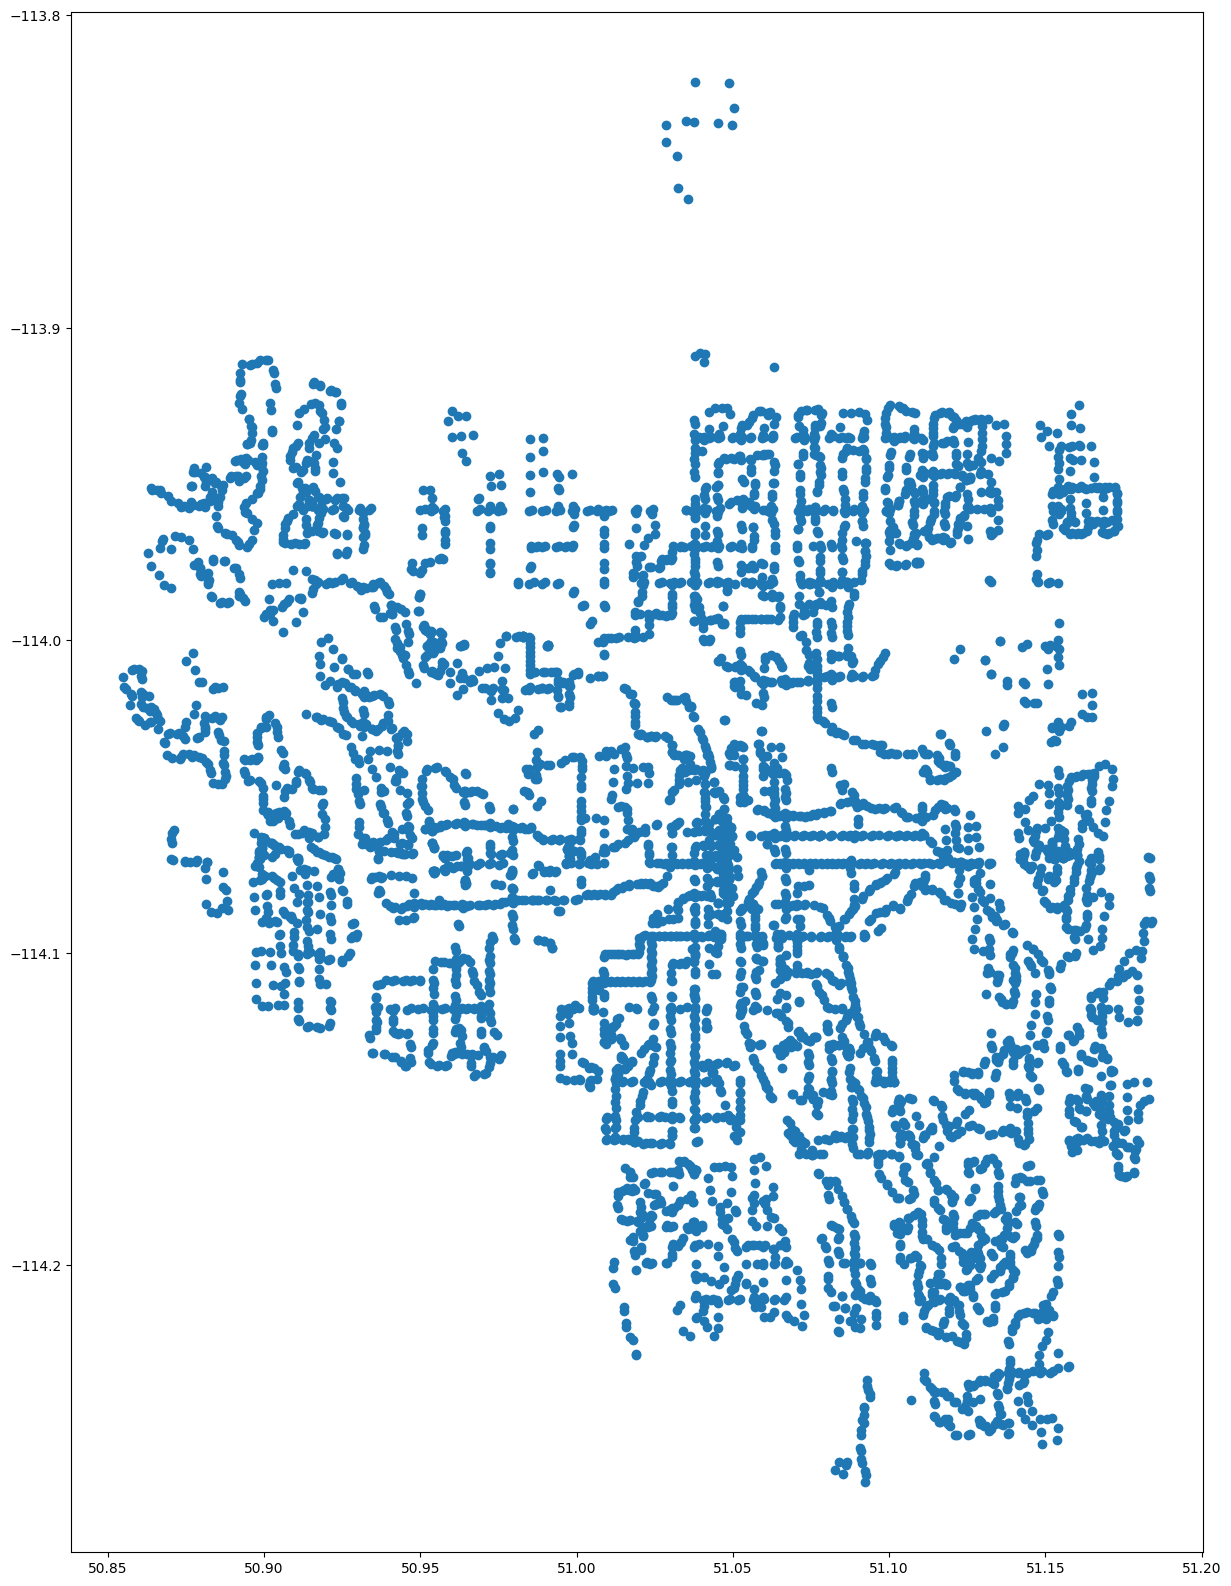

In [ ]:
stop_geo.plot(figsize=(20,20))

In [ ]:
spec_col = ["stop_id","stop_code","stop_name","coordinates"]
stop_geo_selected = stop_geo[spec_col]
stop_geo_selected.to_csv("stop_coordinates.csv", index=False)

In [7]:
community_path = os.getcwd() + "/Community Profiles/"
ward_path = os.getcwd() + "/ward_profiles/"

if os.path.isdir(ward_path):
    try:
        # List all files in the specified folder
        files = os.listdir(ward_path)

        # Extract file names
        file_names = [file for file in files if os.path.isfile(os.path.join(ward_path, file)) and "ward" in file]

        # print("File names in the folder:")
        # for file_name in file_names:
        #     print(file_name)

    except FileNotFoundError:
        print(f"The specified folder '{ward_path}' does not exist.")
    except PermissionError:
        print(f"Permission denied to access '{ward_path}'.")

# data = camelot.read_pdf(ward_path+file_names[0])

In [8]:
pages_to_extract = [2,14,16,17,22]
combined_df = pd.DataFrame()

In [33]:
for i in file_names:
    for j in pages_to_extract:
        data = tabula.read_pdf(ward_path+i, pages = j, multiple_tables =True, lattice=True)
        combined_df = pd.concat([combined_df, data[0].iloc[:,:3]], ignore_index=True)
        # print(data[0].iloc[:,:3])
        
    # break

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tabula/io.py:1045: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tabula/io.py:1045: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tabula/io.py:1045: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packa

In [19]:
# def extract_tables_to_dataframe(ward_path, file_names, pages_to_extract):
#     combined_df = pd.DataFrame()  # Initialize an empty DataFrame for concatenation
    
#     for i in range(len(ward_path)):
#         for j in pages_to_extract:
#             # Read PDF and extract tables
#             data = tabula.read_pdf(os.path.join(ward_path[i], file_names[i]), pages=j, multiple_tables=True)
#             # Assume we're interested in the first table from each extraction
#             if data and len(data[0]) > 0:
#                 # Concatenate the first table from each extraction
#                 combined_df = pd.concat([combined_df, data[0]], ignore_index=True)
    
#     return combined_df

def save_to_csv(df, output_folder, file_name):
    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define the output file path
    output_file_path = os.path.join(output_folder, file_name)
    
    # Save the DataFrame to CSV in the output folder
    df.to_csv(output_file_path, index=False)
    print(f"DataFrame saved to: {output_file_path}")


In [34]:
save_to_csv(combined_df, os.getcwd()+"/Data Sets/Analysis Data", "Ward1.csv")

DataFrame saved to: /Users/sulemanbasit/Project/Calgary-Transit-Economic-Gap-Analysis/Data Sets/Analysis Data/Ward1.csv
